# Homework 5 CSCI 4364/6364 Machine Learning

##**Language Models with Attention and Transformer**

**Due Date: 12/3/2024, 23:59 ET**

---

**Purpose:**
 This homework assignment will give you experience working with the Transformer architecture on a text summarization model. You will learn about generating vocabularies using subword tokenization. In real-world applications, there is a good chance that you will have to repurpose an ML architecture into a different task. Similarly, in this assignment you will convert the Portuguese-English Transformer example into a summarizer. While this is a relatively small language model, interacting with the Transformer will give you an intuition for some of the large language models (LLMs), like GPT4, Gemini, Llama and others. You will review attention weights, and evaluate the quality of your summarizer using the ROUGE score, which is a common but imperfect method of evaluating the quality of summaries.

Before you dive into this homework assignment, you should review the following papers and tutorials:
* **Attention Is all you need** (https://arxiv.org/abs/1706.03762) This is the original paper that will provide a description the design of the Transformer architecture.
* **Neural machine translation with a Transformer and Keras** (https://www.tensorflow.org/text/tutorials/transformer) This is the Tensorflow/Keras language translation model that you will convert from a translator into a summarizer.
* **Subword Tokenizer** (https://www.tensorflow.org/text/guide/subwords_tokenizer) This tutorial will provide you the background to implement your own sub-words tokenizer for the summarization task.
* **Introduction to Text Summarization with ROUGE Scores** (https://towardsdatascience.com/introduction-to-text-summarization-with-rouge-scores-84140c64b471) This post will familiarize you with the abstractive summarization task and present the ROUGE score metric, based on precision and recall of words compared to the training set.

---
**Important!**


* The models you are working with in this homework are quite advanced and require some time and TPU resources to execute. You may consider upgrading to [Colab Pro](https://colab.research.google.com/signup) or the pay-as-you-go subscription if you are running out of memory or if your session disconnects after a while. As you proceed through the assignment, take note of the overall **accuracy**, **runtime**, and the **size** (number of parameters) of your models. Finally, give yourself some time to execute the code in the homework.
* You should run this Colab with a Tensor Processor Unit (**TPU**) runtime with **High RAM** configuration.

---
**A note on using language models**

We want to address using AI tools like ChatGPT for solving programming assignments. While it’s perfectly fine to leverage such tools as a resource, it’s important to ensure that you truly understand the solutions they provide.

As you progress, please make it a priority to:
- Review and study the solutions: Take the time to understand the logic, syntax, and methodology behind the code generated by AI.
- Practice writing similar code on your own: By the end of the semester, you should be confident in solving similar problems independently, as this is crucial for your learning and future assessments.

Remember, the goal is not just to complete the assignments but to develop the skills and confidence needed to code effectively on your own.
If you have any questions or need further clarification about the solutions, don’t hesitate to reach out.



---
**Submission Instructions:**
This assignment will be done entirely in this Colaboratory notebook, and you will submit your notebook via GWU blackboard. Please embed your code in code blocks and add in comments into the text blocks. **Remember to save with outputs!**

**Grading on the notebook:**
This notebook is worth up to 5% (with up to 3% additional extra credit) of the semester grade, where 3% is completion and full functionality, and 2% is based on comments and descriptions, and well-written and commented Python code, based on the coding standards. The notebook should be fully explained and work in its entirety when you submit it.

**Coding Standards:**
Throughout this course, we will use [Google’s Python Style Guide](https://google.github.io/styleguide/pyguide.html) as the coding standard for homework and project submission. A big part of machine learning in industry is applying good programming practices.


**Name:** [please add your name here]

**GW ID:** [your GWU student ID]

In [ ]:
#@title Setup Installation
!pip install datasets
!pip install rouge-score
!pip install -q -U "tensorflow-text==2.8.*"
!pip uninstall -y -q tensorflow keras tensorflow-estimator tensorflow-text
!pip install -q -U tensorflow-text tensorflow tensorflow==2.15.0
print("NOTE: You should restart the runtime session after this completes.")

# Ignore the error:
# ERROR: pip's dependency resolver does not currently take into account all the packages that are installed.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.6/124.6 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
   

In [ ]:
#@title Imports
##########################################################
# Always include all imports at the first executable cell.
##########################################################

import collections
import os
import pathlib
import re
import string
import sys
import tempfile
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from typing import Dict, Optional, Sequence
import tensorflow as tf
from gc import callbacks
import tensorflow_text as text
from tensorflow_text.tools.wordpiece_vocab import bert_vocab_from_dataset as bert_vocab
from google.colab import drive # For saving vocabulary and model checkpoints.
from tensorflow.python.ops.numpy_ops import np_config
from IPython.display import display, HTML
from rouge_score import rouge_scorer
from datasets import load_dataset

The section below sets up folders for the vocabulary and transformer weight checkpoints on Google Drive (gDrive). This ensures that your models are saved if the colab session crashes, and you can recover an existing model from the latest checkpoint. See the [tutorial on colab IO](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=u22w3BFiOveA) for more details on I/O with colabs.

In [ ]:
#@title Set up the vocabulary and checkpoint paths on gDrive

drive.mount('/content/gdrive', force_remount=True)
checkpoint_filepath = F'/content/gdrive/My Drive/ml_course/hw5/models/summarizer/checkpoints'
vocabulary_filepath =  F'/content/gdrive/My Drive/ml_course/hw5/models/summarizer/vocabulary'
vocabulary_file = os.path.join(vocabulary_filepath, 'vocabulary')

# For saving the vocabulary
if not os.path.exists(vocabulary_filepath) :
  print('Creating vocabulary file path %s' %vocabulary_filepath)
  os.makedirs(vocabulary_filepath)

# For saving the model weights
if not os.path.exists(checkpoint_filepath) :
  print('Creating checkpoint directory %s' %checkpoint_filepath)
  os.makedirs(checkpoint_filepath)

Mounted at /content/gdrive


#1. Access the SummScreen dataset from TFDS

The [SummScreen dataset](https://www.tensorflow.org/datasets/catalog/summscreen#summscreentms) is  a collection of scripts and summaries from various TV shows. The goal is to analyze a portion of the script  to generate an abstractive summary. While a larger model might be able to ingest a large portion of the text, we will apply a very conservative limit on the input length. Since  will use the raw plain text input, we’ll need to create a vocabulary and tokenize the data before training a sequence-to-sequence model.

As in previous assignments, you'll be working on **TensorFlow datasets**, so you may want to review the [API](https://www.tensorflow.org/api_docs/python/tf/data/Dataset). Specifically, you should review `map()`, `shuffle()`, `batch()`, and `load()`.

In [ ]:
# @title Load and configure the SummScreen dataset.

dataset = load_dataset("YuanPJ/summ_screen", 'all')


def to_dataset(df: pd.DataFrame):
  df['transcript'] = [trans[0] for trans in df['Transcript']]
  df['recap'] = [recap[0] for recap in df['Recap']]
  return tf.data.Dataset.from_tensor_slices((df['transcript'].values, df['recap'].values))

train_df = pd.DataFrame(dataset['train'])
validation_df = pd.DataFrame(dataset['validation'])
test_df = pd.DataFrame(dataset['test'])


ds_train = to_dataset(train_df)
ds_val = to_dataset(validation_df)
ds_test = to_dataset(test_df)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


summ_screen.py:   0%|          | 0.00/5.48k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/303M [00:00<?, ?B/s]

0001.parquet:   0%|          | 0.00/82.0M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/36.2M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/36.4M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/22588 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2133 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2130 [00:00<?, ? examples/s]

# 2. Create a vocabulary from the training script input data

In this section, use the training scripts to create a vocabulary using `bert_vocab.bert_vocal_from_dataset()`.  You should create TFDS mapping functions that convert the transcripts to lowercase and add `[START]` and `[END]` tokens to transcripts. Unlike the translation task, you will only have to worry about a single language vocabulary and tokenization, since the word-piece encoder works for both input (transcript) and output (recap).

##Q1 Sub-word vocabulary
Describe the advantages a sub-word vocabulary provides over a vocabulary of the same length made up of the most frequently occuring whole words.
> Answer:

In [ ]:
bert_tokenizer_params=dict(lower_case=True)
reserved_tokens=["[PAD]", "[UNK]", "[START]", "[END]"]
VOCABULARY_LENGTH = 8000

bert_vocab_args = dict(
    # The target vocabulary size
    vocab_size = VOCABULARY_LENGTH,
    # Reserved tokens that must be included in the vocabulary
    reserved_tokens=reserved_tokens,
    # Arguments for `text.BertTokenizer`
    bert_tokenizer_params=bert_tokenizer_params,
    # Arguments for `wordpiece_vocab.wordpiece_tokenizer_learner_lib.learn`
    learn_params={},
)

START = tf.argmax(tf.constant(reserved_tokens) == "[START]")
END = tf.argmax(tf.constant(reserved_tokens) == "[END]")


In [ ]:
def to_lowercase(transcript, recap = ""):
  return tf.strings.lower(transcript), tf.strings.lower(recap)


def add_start_end(ragged):
  count = ragged.bounding_shape()[0]
  starts = tf.fill([count,1], START)
  ends = tf.fill([count,1], END)
  return tf.concat([starts, ragged, ends], axis=1)


def get_transcript(transcript, recap):
  return transcript

Create a vocabulary called `en_vocab` by invoking `bert_vocab_from_dataset()` that takes in a dataset the lowercased transcripts and the `**bert_vocab_args` created above. This should complete in less than 10 minutes.

In [ ]:
%%time
en_vocab = bert_vocab.bert_vocab_from_dataset(
    ds_train.batch(1000).map(to_lowercase).map(get_transcript).prefetch(2),
    **bert_vocab_args
)

CPU times: user 22.9 s, sys: 182 ms, total: 23.1 s
Wall time: 21.8 s


In [ ]:
# Inspect the tokens of your vocabulary at different locations:
print(en_vocab[:30])
print(en_vocab[100:110])
print(en_vocab[1000:1010])
print(en_vocab[-10:])

['[PAD]', '[UNK]', '[START]', '[END]', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':']
['do', 'here', 'oh', 'not', 'was', 'hey', 'don', 'previously', 'right', 'at']
['hit', 'marty', 'normal', 'park', 'prison', 'rather', 'teleplay', 'upset', '##ish', '##ley']
['##q', '##{', '##|', '##}', '##~', '##æ', '##‐', '##•', '##♪', '##�']


In [ ]:
ds_train.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>

In [ ]:
#@title Save the vocabulary path to gDrive
def write_vocab_file(filepath, vocab):
  with open(filepath, 'w') as f:
    for token in vocab:
      print(token, file=f)

write_vocab_file(vocabulary_file, en_vocab)
!cat "$vocabulary_file"
print('Saved the vocabulary to %s.' %vocabulary_file)

[PAD]
[UNK]
[START]
[END]
!
"
#
$
%
&
'
(
)
*
+
,
-
.
/
0
1
2
3
4
5
6
7
8
9
:
;
?
@
[
\
]
_
a
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p
q
r
s
t
u
v
w
x
y
z
{
|
}
~
æ
‐
•
♪
�
you
the
to
and
it
on
that
of
is
in
me
this
what
##s
my
we
for
are
so
have
your
re
be
know
can
with
just
all
do
here
oh
not
was
hey
don
previously
right
at
there
up
no
she
get
but
he
out
want
her
about
##ing
if
how
going
okay
one
as
like
now
did
##ed
go
will
from
ve
back
good
come
well
got
see
ll
by
think
time
him
his
sighs
they
scene
tell
when
look
need
brooke
##d
gonna
really
let
or
been
where
who
door
love
please
would
##y
could
some
something
doing
why
an
hope
jack
night
thank
our
yeah
make
say
were
little
over
sorry
has
ridge
nick
way
didn
us
god
##e
down
mean
take
##er
day
hi
had
then
am
home
##ly
##t
baby
call
man
off
music
much
carly
##a
help
uh
any
because
into
michael
morning
should
more
never
##n
again
everything
give
still
sure
them
keep
last
believe
find
house
phone
room
steffy
wait
thing
anything
katie
life
too
ve

In [ ]:
#@title Load the vocabulary path from gDrive
en_tokenizer = text.BertTokenizer(vocabulary_file, **bert_tokenizer_params)

#3. Determine the max input transcript token length

The translation task has two vocabularies, and the maximum token lengths can be the same (the input and output languages have similar lengths). However, in summarization, the input transcript is significantly longer than the output recap, but both can use the same vocabulary. These are two adaptations you will have to add to make the translation architecture into a summarization architecture.

While you can use a reasonable recap (output) length of 64 tokens, you have to figure out a good length for the transcript (input) tokens. Create a histogram of token lengths from a sample of the transcripts to get a feeling for how many tokens cover most transcripts. The max length should be about 1,000 tokens. However, judging by the histogram, you can choose a smaller encoding length to cover most cases instead of all cases.


In [ ]:


for transcript_example, recap_example in ds_train.batch(256).map(to_lowercase):
  transcript_tokens = en_tokenizer.tokenize(transcript_example)
  lengths = transcript_tokens.row_lengths()
  break



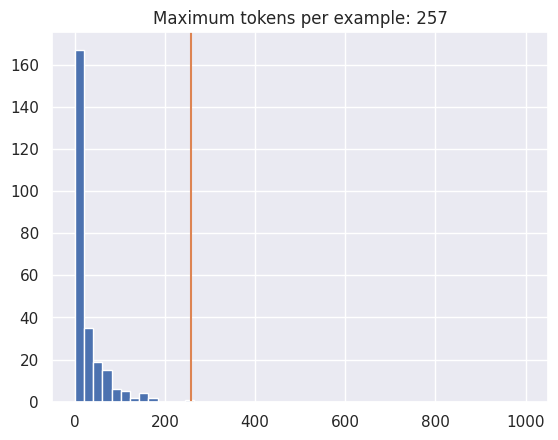

In [ ]:


plt.hist(lengths, np.linspace(0, 1000, 50))
plt.ylim(plt.ylim())
max_length = max(lengths)
plt.plot([max_length, max_length], plt.ylim(), )
plt.title(f'Maximum tokens per example: {max_length}');

Set the `MAX_TOKENS_TRANSCRIPT` based on your histogram analysis. You should replace `MAX_TOKENS` with `MAX_TOKENS_TRANSCRIPT` and `MAX_TOKENS_RECAP`.

**Note**: For this assignment, we'll start with a very small max length. You should first get results (even if they're not great) with a much smaller input length (`MAX_TOKENS_TRANSCRIPT`) than the transcripts to ensure that you have enough resources to execute the assignment completely. Once you have completed the full pass to the results, you can come back and change the architecture and the input data for extra credit.

In [ ]:
MAX_TOKENS_TRANSCRIPT = 256
MAX_TOKENS_RECAP = 64

Next, adapt the transation `prepare_batch()` from the transformer tutorial colab, changing the input arguments from `pt`, `en` to `transcript`, `recap`, and output args from `(pt, en_inputs), en_labels` to `(transcript_tokens, recap_inputs), recap_labels`.

In [ ]:


def prepare_batch(transcript, recap):

    transcript_tokens = en_tokenizer.tokenize(transcript)

    transcript_tokens = transcript_tokens.merge_dims(-2,-1)

    transcript_tokens = transcript_tokens[:, :MAX_TOKENS_TRANSCRIPT]    # Trim to MAX_TOKENS.
    transcript_tokens = add_start_end(transcript_tokens)

    transcript_tokens = transcript_tokens.to_tensor()  # Convert to 0-padded dense Tensor

    recap_tokens = en_tokenizer.tokenize(recap)
    recap_tokens = recap_tokens.merge_dims(-2,-1)

    recap_tokens = recap_tokens[:, :(MAX_TOKENS_RECAP+1)]
    recap_tokens = add_start_end(recap_tokens)
    recap_inputs = recap_tokens[:, :-1].to_tensor()  # Drop the [END] tokens
    recap_labels = recap_tokens[:, 1:].to_tensor()   # Drop the [START] tokens

    return (transcript_tokens, recap_inputs), recap_labels


You can use the same `make_batches()` from the tutorial. When you print out the examples, the transcripts should all have the same lengths, abd the recaps should all have the same lengths because the are truncated.

In [ ]:
BUFFER_SIZE = 20000
BATCH_SIZE = 64

def make_batches(ds):
  return (
      ds
      .shuffle(BUFFER_SIZE)
      .batch(BATCH_SIZE)
      .map(prepare_batch, tf.data.AUTOTUNE)
      .prefetch(buffer_size=tf.data.AUTOTUNE))

In [ ]:
# Create training and validation set batches.
train_batches = make_batches(ds_train)
val_batches = make_batches(ds_val)

In [ ]:
#@title View an example of the input training data.
for (transcript_tokens, recap_inputs), recap_labels in ds_train.batch(1024).map(prepare_batch).take(1):
  print(transcript_tokens)
  print(recap_inputs)
  print(recap_labels)


tf.Tensor(
[[  2  11 685 ...   0   0   0]
 [  2  11  39 ...   0   0   0]
 [  2  11  39 ...   0   0   0]
 ...
 [  2  73  49 ...   0   0   0]
 [  2  73  49 ...   0   0   0]
 [  2  73  49 ...   0   0   0]], shape=(1024, 258), dtype=int64)
tf.Tensor(
[[   2  685 2730 ...   37 2004   74]
 [   2  685   10 ... 2330  343  877]
 [   2  685   10 ... 1256 2088   97]
 ...
 [   2  479  314 ...  886  134   73]
 [   2  479  314 ...  886  134   73]
 [   2  479  314 ...  886  134   73]], shape=(1024, 66), dtype=int64)
tf.Tensor(
[[ 685 2730   85 ... 2004   74    3]
 [ 685   10   55 ...  343  877    3]
 [ 685   10   55 ... 2088   97    3]
 ...
 [ 479  314   73 ...  134   73    3]
 [ 479  314   73 ...  134   73    3]
 [ 479  314   73 ...  134   73    3]], shape=(1024, 66), dtype=int64)


##Q2: Training Data
2.1 Describe the significance of `(transcript_tokens, recap_inputs), recap_labels`.
> Answer:

2.2 Explain the tensor dimensions of each of the input examples.
> Answer:

2.3 What doe the individual value represent?
> Answer:

In [ ]:
for  (transcript_tokens, recap_inputs), recap_labels in train_batches.take(1):
  break

print(transcript_tokens.shape)
print(recap_inputs.shape)
print(recap_labels.shape)

(64, 214)
(64, 66)
(64, 66)


In [ ]:
print(recap_inputs[0][:])
print(recap_labels[0][:])

tf.Tensor(
[   2  266 1792   74 1244  117   74  239   84  516   80  172  113   80
  375   74  114  239   77  119  817   17  116 2074   85  119   78   80
  665   84  133  583  127  113   80 1755 3009   83  379 1810  206   81
  493   79  239   74 2232 3094   75 1734  119 2262   74  100   76   17
  239   37  259  689  792   85   78  119 2262  167], shape=(66,), dtype=int64)
tf.Tensor(
[ 266 1792   74 1244  117   74  239   84  516   80  172  113   80  375
   74  114  239   77  119  817   17  116 2074   85  119   78   80  665
   84  133  583  127  113   80 1755 3009   83  379 1810  206   81  493
   79  239   74 2232 3094   75 1734  119 2262   74  100   76   17  239
   37  259  689  792   85   78  119 2262  167    3], shape=(66,), dtype=int64)


#4. Define the Transformer

This section should follow the steps from the [Transformer demo](https://www.tensorflow.org/text/tutorials/transformer) starting at “Define the components” and `positional_encoding()` step in the Transformer colab. Review each section and ensure that you are familiar with each part of the encoder and decoder of the Transformer.

The end of the section, you should have a class called `Transformer` that is essentially the same as in the tutorial. (No need to copy over the pictures or the text fields, just the code blocks.)

Note that the shapes should reflect your transcript and recap configurations (i.e., they shold not be the same as with the translator).



##Q3 Architecture
Review the [PEGASUS](https://arxiv.org/abs/1912.08777) summarization architecture.

3.1 What are the primary architectural differences between this architecture and PEGASUS?
> Answer:

3.2 How many parameters do $\text{PEGASUS}_{BASE}$ and $\text{PEGASUS}_{LARGE}$ and how many parameters does your model have?
> Answer:



You can set the same parameters as the tutorial, or fine tune the parameters.

In [ ]:
num_layers = 4
d_model = 128
dff = 512
num_heads = 8
dropout_rate = 0.1

In [ ]:
def positional_encoding(length, depth):
  depth = depth/2

  positions = np.arange(length)[:, np.newaxis]     # (seq, 1)
  depths = np.arange(depth)[np.newaxis, :]/depth   # (1, depth)

  angle_rates = 1 / (10000**depths)         # (1, depth)
  angle_rads = positions * angle_rates      # (pos, depth)

  pos_encoding = np.concatenate(
      [np.sin(angle_rads), np.cos(angle_rads)],
      axis=-1)

  return tf.cast(pos_encoding, dtype=tf.float32)

(2048, 512)


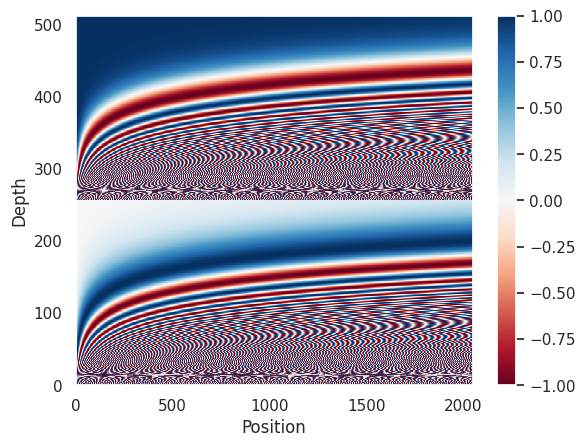

In [ ]:
pos_encoding = positional_encoding(length=2048, depth=512)

# Check the shape.
print(pos_encoding.shape)

# Plot the dimensions.
plt.pcolormesh(pos_encoding.numpy().T, cmap='RdBu')
plt.ylabel('Depth')
plt.xlabel('Position')
plt.colorbar()
plt.show()

(0.0, 1.0)

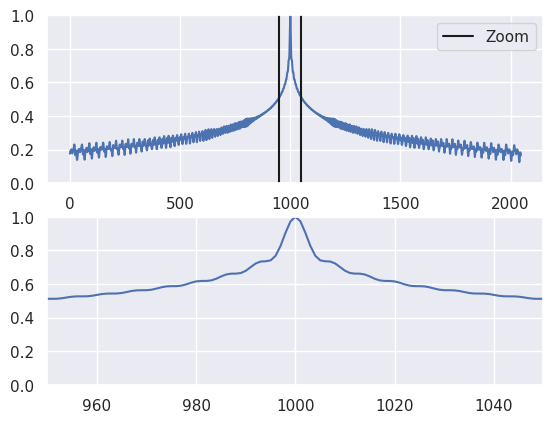

In [ ]:
pos_encoding/=tf.norm(pos_encoding, axis=1, keepdims=True)
p = pos_encoding[1000]
dots = tf.einsum('pd,d -> p', pos_encoding, p)
plt.subplot(2,1,1)
plt.plot(dots)
plt.ylim([0,1])
plt.plot([950, 950, float('nan'), 1050, 1050],
         [0,1,float('nan'),0,1], color='k', label='Zoom')
plt.legend()
plt.subplot(2,1,2)
plt.plot(dots)
plt.xlim([950, 1050])
plt.ylim([0,1])

In [ ]:
class PositionalEmbedding(tf.keras.layers.Layer):
  def __init__(self, vocab_size, d_model):
    super().__init__()
    self.d_model = d_model
    self.embedding = tf.keras.layers.Embedding(vocab_size, d_model, mask_zero=True)
    self.pos_encoding = positional_encoding(length=2048, depth=d_model)

  def compute_mask(self, *args, **kwargs):
    return self.embedding.compute_mask(*args, **kwargs)

  def call(self, x):
    length = tf.shape(x)[1]
    x = self.embedding(x)
    # This factor sets the relative scale of the embedding and positonal_encoding.
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x = x + self.pos_encoding[tf.newaxis, :length, :]
    return x

In [ ]:
embed_pt = PositionalEmbedding(vocab_size=len(en_vocab), d_model=512)
embed_en = PositionalEmbedding(vocab_size=len(en_vocab), d_model=512)

pt_emb = embed_pt(transcript_tokens)
en_emb = embed_en(recap_inputs)

In [ ]:
# TODO: Implement Tranformer here...
class BaseAttention(tf.keras.layers.Layer):
  def __init__(self, **kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
    self.layernorm = tf.keras.layers.LayerNormalization()
    self.add = tf.keras.layers.Add()
class CrossAttention(BaseAttention):
  def call(self, x, context):
    attn_output, attn_scores = self.mha(
        query=x,
        key=context,
        value=context,
        return_attention_scores=True)

    # Cache the attention scores for plotting later.
    self.last_attn_scores = attn_scores

    x = self.add([x, attn_output])
    x = self.layernorm(x)

    return x
class GlobalSelfAttention(BaseAttention):
  def call(self, x):
    attn_output = self.mha(
        query=x,
        value=x,
        key=x)
    x = self.add([x, attn_output])
    x = self.layernorm(x)
    return x
class CausalSelfAttention(BaseAttention):
  def call(self, x):
    attn_output = self.mha(
        query=x,
        value=x,
        key=x,
        use_causal_mask = True)
    x = self.add([x, attn_output])
    x = self.layernorm(x)
    return x
class FeedForward(tf.keras.layers.Layer):
  def __init__(self, d_model, dff, dropout_rate=0.1):
    super().__init__()
    self.seq = tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),
      tf.keras.layers.Dense(d_model),
      tf.keras.layers.Dropout(dropout_rate)
    ])
    self.add = tf.keras.layers.Add()
    self.layer_norm = tf.keras.layers.LayerNormalization()

  def call(self, x):
    x = self.add([x, self.seq(x)])
    x = self.layer_norm(x)
    return x
class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self,*, d_model, num_heads, dff, dropout_rate=0.1):
    super().__init__()

    self.self_attention = GlobalSelfAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.ffn = FeedForward(d_model, dff)

  def call(self, x):
    x = self.self_attention(x)
    x = self.ffn(x)
    return x
class Encoder(tf.keras.layers.Layer):
  def __init__(self, *, num_layers, d_model, num_heads,
               dff, vocab_size, dropout_rate=0.1):
    super().__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.pos_embedding = PositionalEmbedding(
        vocab_size=vocab_size, d_model=d_model)

    self.enc_layers = [
        EncoderLayer(d_model=d_model,
                     num_heads=num_heads,
                     dff=dff,
                     dropout_rate=dropout_rate)
        for _ in range(num_layers)]
    self.dropout = tf.keras.layers.Dropout(dropout_rate)

  def call(self, x):
    # `x` is token-IDs shape: (batch, seq_len)
    x = self.pos_embedding(x)  # Shape `(batch_size, seq_len, d_model)`.

    # Add dropout.
    x = self.dropout(x)

    for i in range(self.num_layers):
      x = self.enc_layers[i](x)

    return x  # Shape `(batch_size, seq_len, d_model)`.
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self,
               *,
               d_model,
               num_heads,
               dff,
               dropout_rate=0.1):
    super(DecoderLayer, self).__init__()

    self.causal_self_attention = CausalSelfAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.cross_attention = CrossAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.ffn = FeedForward(d_model, dff)

  def call(self, x, context):
    x = self.causal_self_attention(x=x)
    x = self.cross_attention(x=x, context=context)

    # Cache the last attention scores for plotting later
    self.last_attn_scores = self.cross_attention.last_attn_scores

    x = self.ffn(x)  # Shape `(batch_size, seq_len, d_model)`.
    return x
class Decoder(tf.keras.layers.Layer):
  def __init__(self, *, num_layers, d_model, num_heads, dff, vocab_size,
               dropout_rate=0.1):
    super(Decoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.pos_embedding = PositionalEmbedding(vocab_size=vocab_size,
                                             d_model=d_model)
    self.dropout = tf.keras.layers.Dropout(dropout_rate)
    self.dec_layers = [
        DecoderLayer(d_model=d_model, num_heads=num_heads,
                     dff=dff, dropout_rate=dropout_rate)
        for _ in range(num_layers)]

    self.last_attn_scores = None

  def call(self, x, context):
    # `x` is token-IDs shape (batch, target_seq_len)
    x = self.pos_embedding(x)  # (batch_size, target_seq_len, d_model)

    x = self.dropout(x)

    for i in range(self.num_layers):
      x  = self.dec_layers[i](x, context)

    self.last_attn_scores = self.dec_layers[-1].last_attn_scores

    # The shape of x is (batch_size, target_seq_len, d_model).
    return x


In [ ]:
class Transformer(tf.keras.Model):
  def __init__(self, *, num_layers, d_model, num_heads, dff,
               input_vocab_size, target_vocab_size, dropout_rate=0.1):
    super().__init__()
    self.encoder = Encoder(num_layers=num_layers, d_model=d_model,
                           num_heads=num_heads, dff=dff,
                           vocab_size=input_vocab_size,
                           dropout_rate=dropout_rate)

    self.decoder = Decoder(num_layers=num_layers, d_model=d_model,
                           num_heads=num_heads, dff=dff,
                           vocab_size=target_vocab_size,
                           dropout_rate=dropout_rate)

    self.final_layer = tf.keras.layers.Dense(target_vocab_size)

  def call(self, inputs):
    # To use a Keras model with `.fit` you must pass all your inputs in the
    # first argument.
    context, x  = inputs

    context = self.encoder(context)  # (batch_size, context_len, d_model)

    x = self.decoder(x, context)  # (batch_size, target_len, d_model)

    # Final linear layer output.
    logits = self.final_layer(x)  # (batch_size, target_len, target_vocab_size)

    try:
      # Drop the keras mask, so it doesn't scale the losses/metrics.
      # b/250038731
      del logits._keras_mask
    except AttributeError:
      pass

    # Return the final output and the attention weights.
    return logits


In [ ]:
transformer = Transformer(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    input_vocab_size=VOCABULARY_LENGTH,
    target_vocab_size=VOCABULARY_LENGTH,
    dropout_rate=dropout_rate)

In [ ]:
output = transformer((transcript_tokens, recap_inputs))

print(transcript_tokens.shape)
print(recap_inputs.shape)
print(output.shape)

(64, 214)
(64, 66)
(64, 66, 8000)


In [ ]:
transformer.summary()

Model: "transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Encoder)           multiple                  3662848   
                                                                 
 decoder (Decoder)           multiple                  5773824   
                                                                 
 dense_16 (Dense)            multiple                  1032000   
                                                                 
Total params: 10468672 (39.93 MB)
Trainable params: 10468672 (39.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super().__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    step = tf.cast(step, dtype=tf.float32)
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)


  def get_config(self):
    """Must implement get_config() to enable checkpointing."""
    config = {
    'd_model': self.d_model,
    'warmup_steps': self.warmup_steps,

     }
    return config

In [ ]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)



In [ ]:
def masked_loss(label, pred):
  mask = label != 0
  loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
  loss = loss_object(label, pred)

  mask = tf.cast(mask, dtype=loss.dtype)
  loss *= mask

  loss = tf.reduce_sum(loss)/tf.reduce_sum(mask)
  return loss


def masked_accuracy(label, pred):
  pred = tf.argmax(pred, axis=2)
  label = tf.cast(label, pred.dtype)
  match = label == pred

  mask = label != 0

  match = match & mask

  match = tf.cast(match, dtype=tf.float32)
  mask = tf.cast(mask, dtype=tf.float32)
  return tf.reduce_sum(match)/tf.reduce_sum(mask)

Below, compile and train the transformer. This may take hours, but you can call fit multiple times on the same model to give you a sense of the progress the model is making on the summarization task.

In [ ]:
transformer.compile(
    loss=masked_loss,
    optimizer=optimizer,
    metrics=[masked_accuracy])

If you have already done some training, and want to recover the transformer from checkpoint, the block below will load up the existing transformer.

In [ ]:
try:
  transformer.load_weights(checkpoint_filepath)
  print("Loaded a checkpoint from %s." %checkpoint_filepath)

except OSError:
  print('No checkpoints found, and not able to load a model.')

No checkpoints found, and not able to load a model.


#5. Train the Summarizer

**Note that `transfomer.fit()` will take several hours to execute, even with a TPU runtime.** Here, we add in saving checkpoints after every episode. This way, if the colab runtime disconnects, you can recover the trained transformer entirely by loading up the weights stored in the checkpoints.

In [ ]:
%%time
NUM_EPOCHS = 100
try:
  transformer.load_weights(checkpoint_filepath)
  print("Loaded a checkpoint from %s." %checkpoint_filepath)

except OSError:
  print('No checkpoints found. Starting a new transformer model')

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_masked_accuracy', # Save when the validation masekd accuracy improves
    mode='max',
    save_best_only=True)

transformer.fit(train_batches,
                epochs=NUM_EPOCHS,
                validation_data=val_batches, callbacks=[model_checkpoint_callback])

No checkpoints found. Starting a new transformer model
Epoch 1/100
353/353 [==============================] - 1089s 3s/step - loss: 7.8935 - masked_accuracy: 0.0320 - val_loss: 6.5046 - val_masked_accuracy: 0.0597
Epoch 2/100
353/353 [==============================] - 1070s 3s/step - loss: 5.8086 - masked_accuracy: 0.1219 - val_loss: 5.1314 - val_masked_accuracy: 0.1593
Epoch 3/100
353/353 [==============================] - 1063s 3s/step - loss: 4.8667 - masked_accuracy: 0.1801 - val_loss: 4.5589 - val_masked_accuracy: 0.2053
Epoch 4/100
353/353 [==============================] - 1076s 3s/step - loss: 4.4422 - masked_accuracy: 0.2139 - val_loss: 4.2367 - val_masked_accuracy: 0.2315
Epoch 5/100
353/353 [==============================] - 1066s 3s/step - loss: 4.1644 - masked_accuracy: 0.2358 - val_loss: 4.0037 - val_masked_accuracy: 0.2507
Epoch 6/100
353/353 [==============================] - 1049s 3s/step - loss: 3.9566 - masked_accuracy: 0.2526 - val_loss: 3.8448 - val_masked_accuracy

Some fairly minor modifications were required to change the `Translator` into the `Summarizer` class. Only one vocabulary is used and the tokenizer here uses a `detokenize()` method to convert from index to token string.

In [ ]:
class Summarizer(tf.Module):
  def __init__(self, tokenizer, transformer):
    self.tokenizer = tokenizer
    self.transformer = transformer

  def __call__(self, sentence, max_length=MAX_TOKENS_RECAP):

    assert isinstance(sentence, tf.Tensor)
    if len(sentence.shape) == 0:
      sentence = sentence[tf.newaxis]

    sentence = self.tokenizer.tokenize(sentence)
    sentence_tokens = sentence.merge_dims(-2,-1)
    sentence_tokens = add_start_end(sentence_tokens)

    sentence = sentence_tokens.to_tensor()

    encoder_input = sentence

    # As the output language is English, initialize the output with the
    # English `[START]` token.
    # start_end = self.tokenizer.tokenize([''])[0]
    start_end = tf.convert_to_tensor(np.array([START,END]), dtype=tf.int64)

    start = start_end[0][tf.newaxis]
    end = start_end[1][tf.newaxis]

    # `tf.TensorArray` is required here (instead of a Python list), so that the
    # dynamic-loop can be traced by `tf.function`.
    output_array = tf.TensorArray(dtype=tf.int64, size=0, dynamic_size=True)
    output_array = output_array.write(0, start)

    for i in tf.range(max_length):
      output = tf.transpose(output_array.stack())

      predictions = self.transformer([encoder_input, output], training=False)

      # Select the last token from the `seq_len` dimension.
      predictions = predictions[:, -1:, :]  # Shape `(batch_size, 1, vocab_size)`.

      predicted_id = tf.argmax(predictions, axis=-1)

      # Concatenate the `predicted_id` to the output which is given to the
      # decoder as its input.
      output_array = output_array.write(i+1, predicted_id[0])

      if predicted_id == end:
        break

    output = tf.transpose(output_array.stack())
    # We had to add in detokenise for this tokenizer. The to_tensor() call
    # converts a RaggedTensor into a normal Tensor.
    tokens = self.tokenizer.detokenize(output).to_tensor()
    # The output shape is `(1, tokens)`.
    tokens = np.array([b.decode("utf-8") for b in tokens[0].numpy()])  # Shape: `()`.

    text = " ".join(tokens[1:-1])

    # `tf.function` prevents us from using the attention_weights that were
    # calculated on the last iteration of the loop.
    # So, recalculate them outside the loop.
    self.transformer([encoder_input, output[:,:-1]], training=False)
    attention_weights = self.transformer.decoder.last_attn_scores

    return text, tokens, attention_weights

In [ ]:
#@title Create a summarizer by combining the tokenizer and the transformer
summarizer = Summarizer(en_tokenizer, transformer)


In [ ]:
#@title Show an example prediction and compare it to the ground truth
def print_summary(sentence, tokens, ground_truth):
  print(f'{"Input:":15s}: {sentence}')
  print(f'{"Prediction":15s}: {" ".join([ tokens])}')
  print(f'{"Ground truth":15s}: {ground_truth}')



sentence = 'In the media immersion lab (Spinner is listening to Craig\'s new CD.)'
target_recap = 'Downtown Sasquatch has a wedding gig, and Craig decides to put all of his focus on the music, but things get complicated when Manny and Ellie vie for Craig\'s attention. Meanwhile, Joey has a date with the bride\'s sister but wonders if he\'s too old for her when he overhears her friends gossiping about him.'
transcript = 'In Craig\'s garage, the band is practicing Craig: (Singing) Well somebody better stop me \'cause my feet don\'t touch the ground. I can\'t keep my hands off of you and there\'s nothing I can do- (The sound is really off and Craig gives them a weird look.) Craig: (Singing) I can\'t keep my hands off of you. Craig: Alright stop. Stop! Jimmy, look unless your last name is Hendrix and you\'ve come back to rock us from the grave. No solos while I\'m singing! Marco: We\'re never gonna get a wedding job.'
summarized_text, translated_tokens, attention_weights = summarizer(  tf.constant(transcript))
print(summarized_text)
print_summary(transcript, summarized_text, target_recap)

#6. Evaluate the summarizer

In [ ]:
#@title Example of ROUGE-1 and ROUGE-L
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
scores = scorer.score('The quick brown fox jumps over the lazy dog',
                      'The quick brown dog jumps on the log.')
print(scores)

In [ ]:
#@title Some utilities for plotting and displaying results
np_config.enable_numpy_behavior()


def transcript_to_tokens(transcript):
  in_tokens = tf.convert_to_tensor([transcript])
  in_tokens = en_tokenizer.tokenize(in_tokens)

  in_tokens = en_tokenizer.detokenize(in_tokens).to_tensor()[0]
  return in_tokens.reshape(in_tokens.shape[0])

def get_attention_head(attention_weights, head_id):
  attention_heads = tf.squeeze(attention_weights, 0)
  return attention_heads[head_id]


def plot_attention_head(in_tokens, summary_tokens, attention):
  # The model didn't generate `<START>` in the output. Skip it.
  summary_tokens = summary_tokens[1:]

  n_rows = len(summary_tokens)
  n_cols = len(in_tokens)
  fig, ax = plt.subplots(figsize=(int(n_cols/3),int(n_rows/3)))

  ax.matshow(attention[:n_rows, :n_cols])
  ax.set_xticks(range(n_cols))
  ax.set_yticks(range(n_rows))

  labels = [label.decode('utf-8') for label in in_tokens.numpy()]
  ax.set_xticklabels( labels, rotation=90)

  labels = summary_tokens
  ax.set_yticklabels(labels)

  plt.show()

In [ ]:
head = 1
import tensorflow_datasets as tfds


df_test = tfds.as_dataframe(ds_test.shuffle(1000000).take(20000), ds_info=dataset_info.DatasetInfo())

plot_attention_weights = True
results  = []
for i in range(len(df_test)):
  print("Example %d of %d: " %(i + 1, len(df_test)))
  recap = df_test.iloc[i]['recap'].decode("utf-8")
  transcript = df_test.iloc[i]['transcript'][:MAX_TOKENS_TRANSCRIPT].decode("utf-8").replace('\n', ' ')
  summarized_text, summary_tokens, attention_weights = summarizer(  tf.constant(transcript))
  print_summary(transcript, summarized_text, recap)
  score = scorer.score(target = recap, prediction = summarized_text)
  result = {'ROUGE1_precision': score['rouge1'].precision,
                  'ROUGE1_recall': score['rouge1'].recall,
                  'ROUGE1_fmeasure': score['rouge1'].fmeasure,
                  'ROUGEL_precision': score['rougeL'].precision,
                  'ROUGEL_recall': score['rougeL'].recall,
                  'ROUGEL_fmeasure': score['rougeL'].fmeasure,
                  'ground_truth': recap,
                  'prediction': summarized_text,
                  'input': transcript
             }
  # Plot out the ROUGE scores
  for key, value in result.items():
    if key.startswith('ROUGE'):
      print("%12s: %3.2f" %(key, value))

  results.append(result)

  if plot_attention_weights:
    in_tokens = transcript_to_tokens(transcript)
    attention = get_attention_head(attention_weights, 1)
    plot_attention_head(in_tokens, summary_tokens, attention )



test_results = pd.DataFrame(results)
print(test_results.describe())

##Q4 Evaluation

4.1 What are the highest ROUGE 1/L scores (precision, recall, f-measure) your model was able to attain?
> Answer:

4.2 Review at least ten summaries manually. Are the summaries gramatically correct? Do the summaries capture the meaning of the associated transcripts?
> Answer:

4.3 How well do the ROUGE metrics capture the quality of a summary?
> Answer:

4.4 Review the attention plots. Provide three examples where the attention links a word from the transcript to the summary.
> Answer:

##Q5 [OPTIONAL up to 3 semester points] Architecture Enhancement  

Apply at least two parameter changes that yield significantly better results based on ROUGE 1 or ROUGE L against the original design. (Running for more iterations does not count.)

5.1 What parameter changes did you make?
> Answer:

5.2 How much improvment in ROUGE scores did you observe?
> Answer:

5.3 Provide a brief explanation of why the changes yieled better performance.
> Answer: